In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.integrate import solve_ivp

# Most basic problem (no discounter)

In [39]:
alpha, beta = .2, 5

A, B, Q, R = np.array([[-beta]]), np.array([[-1]]), np.array([[1]]), np.array([[alpha]])

# Solve the Ricatti equation
P = linalg.solve_continuous_are(A, B, Q, R)
P

array([[0.09544512]])

In [43]:
n_0 = np.array([1])

def pollution_ode(t, n):
    return np.array([1 - linalg.inv(R)@B.T@n -beta*n])

t_span = (0,10)
t_eval = np.linspace(t_span[0], t_span[-1], 100)


n = solve_ivp(pollution_ode, t_span=t_span, y0=n_0, t_eval=t_eval).y

In [44]:
tau = linalg.inv(R)@P@n
tau.shape

(1, 100)

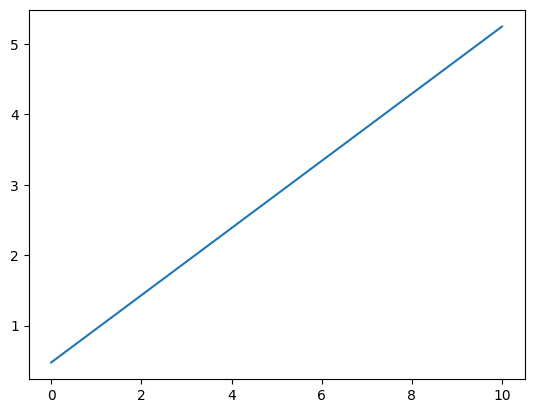

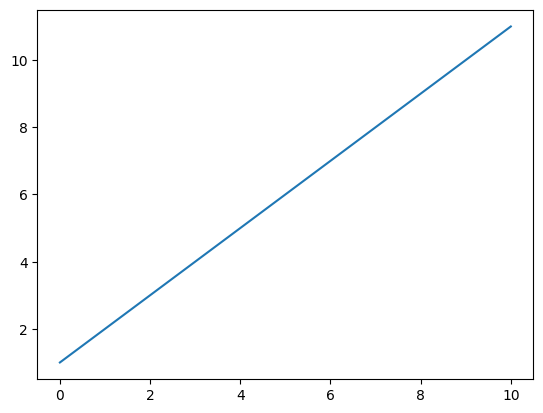

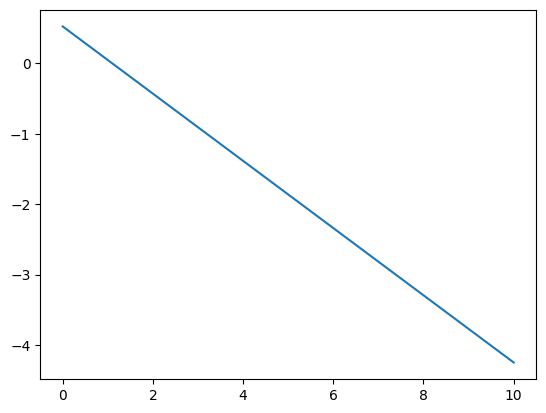

In [45]:
plt.plot(t_eval, tau[0,:])
plt.show()

plt.plot(t_eval, n[0,:])
plt.show()
plt.plot(t_eval, 1-tau[0,:])
plt.show()